# Try changing the distribution in Lebedev idea

In [19]:
%reset -f
import numpy as np
from LebedevHelper import *

import matplotlib.pyplot as plt
import scipy.stats as st
import scipy.special as spec
import matplotlib as mpl
from matplotlib.colors import LogNorm
import matplotlib.cm as cm
import scipy.integrate as integrate
%matplotlib notebook


In [29]:
# Set style of plots
ticksize= 14     + 4*1
titlesize = 18   + 8*1
# mpl.style.use('classic')
mpl.rcParams.update({'font.size':ticksize }) 
mpl.rcParams.update({'legend.fontsize':ticksize })# legend
mpl.rcParams.update({'ytick.labelsize':ticksize })
mpl.rcParams.update({'xtick.labelsize':ticksize})
mpl.rcParams.update({'axes.titlesize':titlesize})       # Title
mpl.rcParams.update({'axes.labelsize':titlesize})    # x,y,cbar labels
mpl.rcParams.update({'figure.titlesize' :titlesize})
mpl.rcParams.update({'savefig.bbox':'tight'})
mpl.rcParams.update({'axes.formatter.limits':[-4,4]})
mpl.rcParams.update({'figure.figsize':[6,5]})
mpl.rcParams.update({'mathtext.fontset':'cm'})
mpl.rcParams.update({'font.style':'normal'})
mpl.rcParams.update({'image.cmap':'rainbow'})
mpl.rcParams.update({'axes.formatter.useoffset':False})   # no offset of axis
mpl.rcParams.update({'axes.formatter.use_mathtext':True}) # Change from 1e4 to 10^4 

# To use unicode
mpl.rc('font', **{'sans-serif' : 'Arial','family' : 'sans-serif'})
# To get sans-serif
params = {'text.usetex': False, 'mathtext.fontset': 'stixsans'}
plt.rcParams.update(params)


<IPython.core.display.Javascript object>


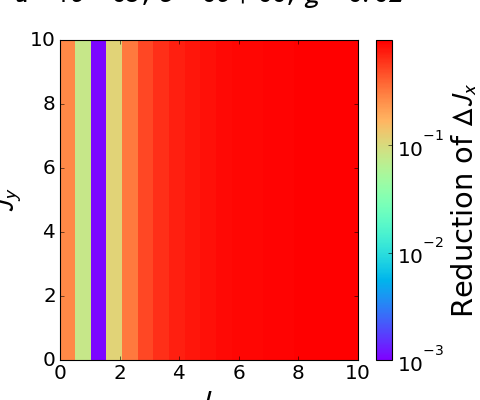

/home/sfuruset/miniconda3/lib/python3.5/site-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


<IPython.core.display.Javascript object>


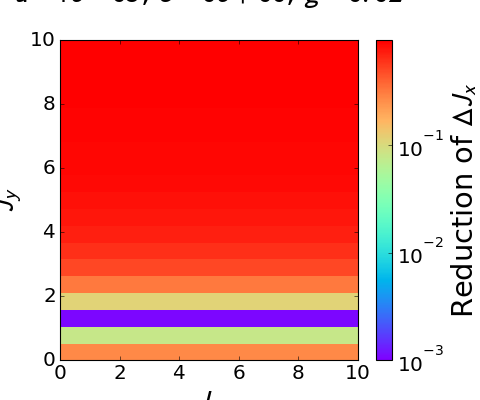

In [30]:
###################################################
a= 1e-3
b= 0
# a = 1.64e-4  ;  b = -1.16e-4
# a = 2*a
g= 0.02
jmax= 10
jx = np.linspace(0,jmax,20)
jy = jx
JX,JY = np.meshgrid(jx,jy)

for i in [1,2]:

    if i==1:
        F = octu_leb(JX,JY,a,b,g)
    else:
        F = octu_leb(JX,JY,b,a,g)
    vmin = np.min(F)
    vmax = np.max(F) 
    # vmax = 1.0
    vmin = 10**(int(np.log10(vmax * 1e4)-7))
    plt.figure()
    plt.pcolor(JX,JY,F,norm =LogNorm(vmin=vmin,vmax=vmax))
    plt.colorbar(label=r'Reduction of $\Delta J_x$')
    plt.title(r"$a=%.0e$, $b=%.0e$, $g=%.2f$"%(a,b,g)+'\n')
    plt.xlabel(r'$J_x$')
    plt.ylabel(r'$J_y$')
    plt.savefig("03_Plots/DACTX_JxJy_a=%.0e_b=%.0e_g=%.0e.eps"%(a,b,g))




In [5]:
# f = lambda y, x: x*y**2
# integrate.dblquad(f, 0, 2, lambda x: 0, lambda x: 1)
# integrate.dblquad(int_octu_leb,0,100,lambda x : 0 , lambda x: 100 , args = (a,b,g,))


a 0.001
b -0.0
x 0.0 0.016666666666666673 0.8333333333333337
y 0.0 0.0 0.0
Max growth 0.8333333333333337
Jx (1000000,)
Jy (1000000,)
Weights (1000000,)


<IPython.core.display.Javascript object>


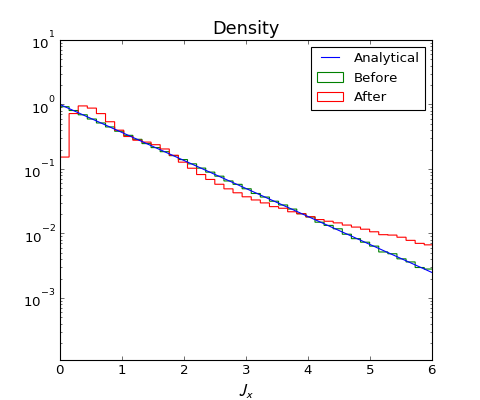

/home/sfuruset/miniconda3/lib/python3.5/site-packages/ipykernel/__main__.py:60: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.


[]


In [6]:
#Initial distribution
nbin=100
nbin2=100
 
a=1e-3 
b=-a * 0 
g= 0.02

noiseAmp = 0.0
sepx = 0.1* np.sqrt(10)/np.sqrt(3)
sepy = 0.0 * np.sqrt(10) /np.sqrt(3)
N = int(1e6)
numt = 50
Jmax=6

dist=1
study=1

dJx_exp = 0.5*sepx**2
dJy_exp = 0.5*sepy**2
print('a',a)
print('b',b)
print("x",noiseAmp,dJx_exp,dJx_exp*numt)
print("y",noiseAmp,dJy_exp,dJy_exp*numt)
print("Max growth",numt*dJx_exp)


if dist==1:
    Jx = st.chi2.rvs(2, size=N)*0.5
    Jy = st.chi2.rvs(2, size=N)*0.5
    weights = np.ones(N)
elif dist==2:
    Jx = np.random.uniform(0,Jmax,N)
    Jy = np.random.uniform(0,Jmax,N)
    weights = np.exp(-Jx-Jy)
elif dist==3:
    N1 = int(N/2)
    Jx1 = st.chi2.rvs(2, size=N1)*0.5
    Jy1 = st.chi2.rvs(2, size=N1)*0.5
    weights1 = np.ones(N1)
    Jx2 = np.random.uniform(0,Jmax,N-N1)
    Jy2 = np.random.uniform(0,Jmax,N-N1)
    weights2 = np.exp(-Jx2-Jy2)
    Jx = np.concatenate((Jx1,Jx2))
    Jy = np.concatenate((Jy1,Jy2))
    weights = np.concatenate((weights1,weights2))

print('Jx',np.shape(Jx))
print('Jy',np.shape(Jy))
print('Weights',np.shape(weights))


Jx0 = Jx.copy()
Jy0 = Jy.copy()

plt.figure()
x = np.linspace(0,Jmax*1.2,100)
plt.plot(x,np.exp(-x),label='Analytical')

vals,edges = np.histogram(Jx,bins=nbin,normed=True,weights=weights);
# center = center_edges(edges)
# plt.plot(center,vals,label='Before')
plt.hist(Jx,bins=edges,normed=True, histtype='step',label='Before',weights=weights)

fac = integrate.nquad(int_octu_leb, [[0,100],[0,100]],args = (a,b,g))[0]
for i in range(numt):
    facH = octu_leb(Jx,Jy,a,b,g)
    facV = octu_leb(Jx,Jy,b,a,g)
    if study==0:
        Jx+= (dJx_exp )*facH
        Jy+= (dJy_exp )*facV
    
    if study==1:
        # Problem when sepx > sqrt(2*Jx) because then jx-sepx*sqrt(2Jx) < 0
        Jx+= (dJx_exp + sepx*np.sqrt(2*Jx)*np.cos(np.random.uniform(0,pi2,N)) )*facH
        Jy+= (dJy_exp + sepy*np.sqrt(2*Jy)*np.cos(np.random.uniform(0,pi2,N)) )*facV
    

    elif study==2:
        #Try to modify. the current one is o so wrong
        facH = octu_leb(Jx,Jy,a,b,g)
        facV = octu_leb(Jx,Jy,b,a,g)
        Jx+= (dJx_exp )*facH + sepx*np.sqrt(2*Jx)*np.cos(np.random.uniform(0,pi2,N))*1
        Jy+= (dJy_exp )*facV + sepy*np.sqrt(2*Jy)*np.cos(np.random.uniform(0,pi2,N))*1
        Jx = np.abs(Jx) 
        Jy = np.abs(Jy) 
        
    elif study==3:
        Jx+= dJx_exp*octu_leb(Jx,Jy,a,b,g)
        Jy+= dJy_exp*octu_leb(Jx,Jy,a,b,g)

        Jx += np.random.randn(N)*noiseAmp# np.sqrt(np.random.randn(N)**2)*noiseAmp
        Jy += np.random.randn(N)*noiseAmp
        Jx  = np.abs(Jx)
        Jy  = np.abs(Jy)
    
    elif study==4:
        #Try to modify. the current one is o so wrong
        
        Jx+= (dJx_exp )*facH + sepx*np.sqrt(2*Jx)*np.cos(np.random.uniform(0,pi2,N))*1
        Jy+= (dJy_exp )*facV + sepy*np.sqrt(2*Jy)*np.cos(np.random.uniform(0,pi2,N))*1
        Jx = np.abs(Jx) 
        Jy = np.abs(Jy) 
        
# vals,edges = np.histogram(Jx,bins=edges,normed=True);
# center = center_edges(edges)
# plt.plot(center,vals,label='After')

print(Jx[Jx<0])
vals,_,_=plt.hist(Jx,bins=edges,normed=True, histtype='step',label='After',weights=weights)
plt.xlim(0,Jmax)
# plt.ylim(np.min(vals[int(nbin/2):]),10) #[np.nonzero(a)]
plt.ylim(np.min(vals[np.nonzero(vals)]),10)
plt.yscale('Log')
plt.legend(loc=0)
plt.xlabel(r'$J_x$')
plt.title("Density")


<IPython.core.display.Javascript object>


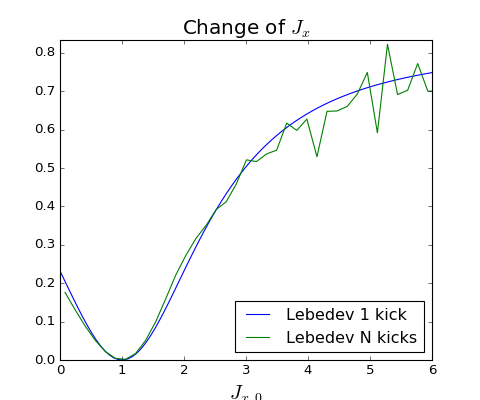

/home/sfuruset/miniconda3/lib/python3.5/site-packages/ipykernel/__main__.py:7: RuntimeWarning: invalid value encountered in true_divide


<IPython.core.display.Javascript object>


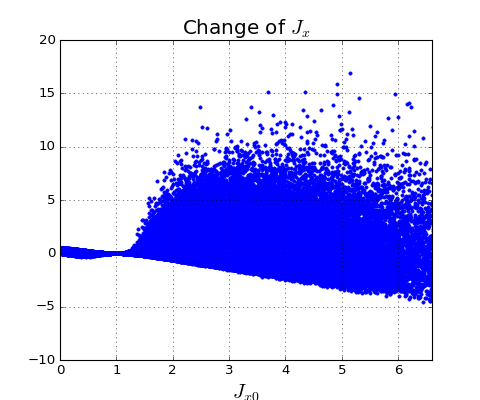

/home/sfuruset/miniconda3/lib/python3.5/site-packages/ipykernel/__main__.py:59: RuntimeWarning: invalid value encountered in true_divide


<IPython.core.display.Javascript object>


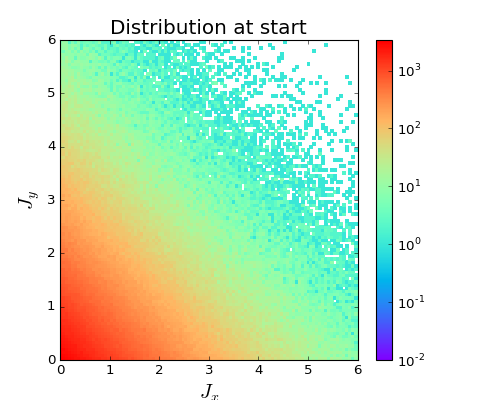

<IPython.core.display.Javascript object>


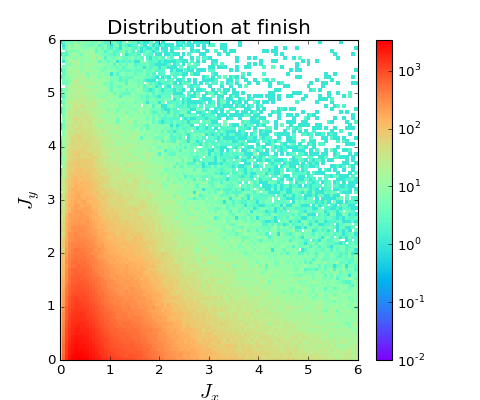

<IPython.core.display.Javascript object>


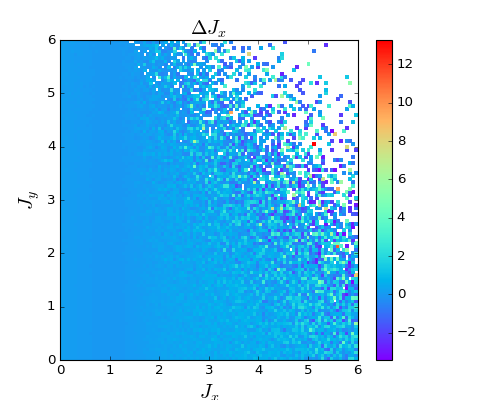

<IPython.core.display.Javascript object>


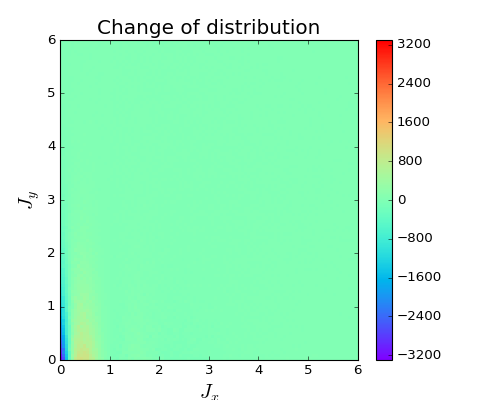

<IPython.core.display.Javascript object>


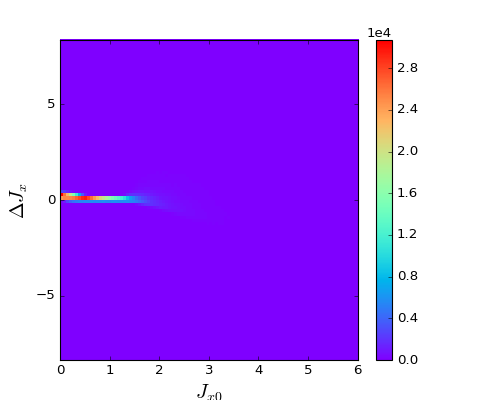

In [9]:
plt.figure()
plt.xlabel(r'$J_{x,0}$')
plt.title(r"Change of $J_x$")
xx=Jx0
W,edges = np.histogram(xx,bins=edges)
vals,_ = np.histogram(xx,bins=edges,weights=Jx-Jx0)
vals = vals/W

leb1=np.zeros_like(x)
for i,J in enumerate(x):
    leb1[i] = integrate.quad(intJy_octu_leb,0,100,args = (J,a,b,g))[0]


plt.plot(x, dJx_exp*numt*leb1,label='Lebedev 1 kick')
# plt.plot(x,dJx_exp*numt*octu_leb(x,0,a,b,g),label='Lebedev')
plt.plot(center_edges(edges),vals,label='Lebedev N kicks')
# plt.hist(Jx0,bins=edges,histtype='step',weights=Jx-Jx0,label='Numerical');
# plt.ylim(0,0.4)
l1,l2 = plt.ylim()
plt.ylim(max(l1,0),min(l2,dJx_exp*numt))
plt.xlim(0,Jmax)
plt.legend(loc=0)
plt.savefig("03_Plots/DACT_Lebedev_OPa%.0e_OPb%.0e_nt%d_np%d_Kx%.0e.eps"%(a,b,numt,N,sepx))
plt.savefig("03_Plots/DACT_Lebedev_OPa%.0e_OPb%.0e_nt%d_np%d_Kx%.0e.png"%(a,b,numt,N,sepx))

# # Plot 2d
# plt.pcolor(JX,JY,F,norm =LogNorm(vmin=vmin,vmax=vmax))
# plt.colorbar(label=r'Reduction of $\Delta J_x$')
# plt.title(r"$a=%.0e$, $b=%.0e$, $g=%.2f$"%(a,b,g)+'\n')
# plt.xlabel(r'$J_x$')
# plt.ylabel(r'$J_y$')

plt.figure()
plt.xlabel(r'$J_{x0}$')
plt.title(r"Change of $J_x$")
plt.plot(Jx0,Jx-Jx0,'.')
plt.xlim(0,Jmax*1.1)
plt.grid(True)

###################################################################
################ PCOLOR with NANS #################################
###################################################################

H0,xedges,yedges = np.histogram2d(Jx0,Jy0,nbin2,range=[[0,Jmax],[0,Jmax]],weights=weights);
H0=H0.transpose()
X,Y = np.meshgrid(xedges,yedges)

H1,xedges,yedges = np.histogram2d(Jx,Jy,nbin2,range=[[0,Jmax],[0,Jmax]],weights=weights);
H1=H1.transpose()

# H2,xedges,yedges = np.histogram2d(Jx0,Jx-Jx0,nbin2,range=[[0,Jmax],[0,Jmax]],weights=weights);
# H2=H1.transpose()


DJx = Jx-Jx0
# H3,xedges,yedges = np.histogram2d(Jx0,Jy0,nbin2,range=[[0,Jmax],[0,Jmax]],weights=DJx);
W,xedges,yedges = np.histogram2d(Jx0,Jy0,nbin2,range=[[0,Jmax],[0,Jmax]]); #weights=1
H3,xedges,yedges = np.histogram2d(Jx0,Jy0,nbin2,range=[[0,Jmax],[0,Jmax]],weights=DJx);
H3=(H3/W).transpose()


# F = H3/H1 # (H2-H1)/H1
FS = [H0,H1,H3,H1-H0]
for i,F in enumerate(FS):
#     if i==3: continue
    F = np.ma.masked_where(np.isnan(F), F)
    # F = np.ma.masked_where(np.nonzero(F), F)
    
    plt.figure()
    plt.title(["Distribution at start", "Distribution at finish", r"$\Delta J_x$","Change of distribution"][i])
    if i==3 or i ==2:
        vmax =np.nanmax(np.abs(F))
        vmin=np.nanmin(F)
        plt.pcolor(X,Y,F,vmin=vmin,vmax=vmax)
    else:
        vmax =np.nanmax(np.abs(F))
        vmin=[1,1,1e-3][dist]
        vmin=1e-2
        if i==2:
            vmin=1
        plt.pcolor(X,Y,F,norm =LogNorm(vmin=vmin,vmax=vmax))
    
    plt.colorbar()
    plt.xlabel(r'$J_x$')
    plt.ylabel(r'$J_y$')
    
    
plt.figure()    
plt.ylabel(r"$\Delta J_x$")
plt.xlabel(r'$J_{x0}$')
lim = numt*dJx_exp*1e1
plt.hist2d(Jx0,Jx-Jx0,nbin2,range=[[0,Jmax],[-lim,lim]],weights=weights);
plt.colorbar()

In [242]:
print(np.max(Jx-Jx0))
np.cos(pi2*np.random.uniform(0,1,N)) 
print(Jx0)

12.4557897619
[ 5.65624131  2.75016417  4.42426276 ...,  5.51908178  5.9597329
  3.78278052]


## Change of lebedev curve
We see an improvement with regards to expectations with just multiple kicks based on the average. <br>

However, we see that the  +- behavior destroys this. and I do not perfectly understand how it is affected by the

<IPython.core.display.Javascript object>


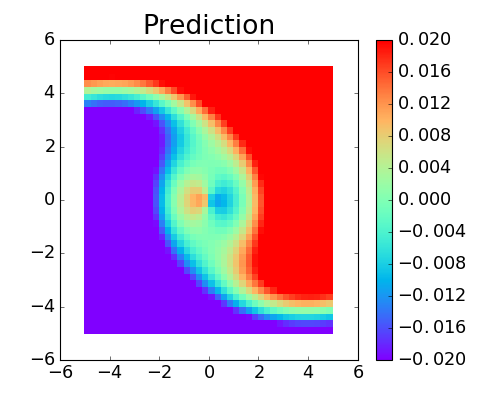

<IPython.core.display.Javascript object>


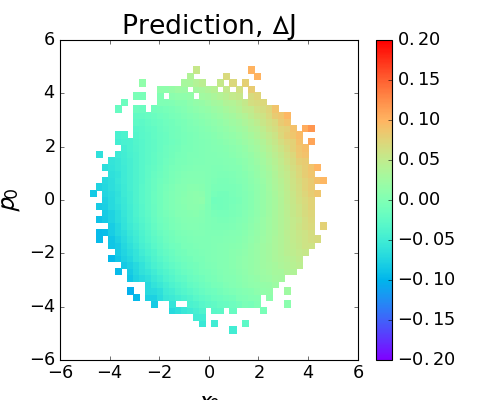

/home/sfuruset/miniconda3/lib/python3.5/site-packages/ipykernel/__main__.py:100: RuntimeWarning: invalid value encountered in true_divide


<IPython.core.display.Javascript object>


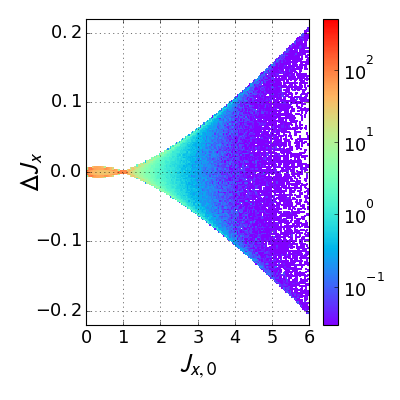

0.014876809101925292 187.59656277528725


/home/sfuruset/miniconda3/lib/python3.5/site-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


<IPython.core.display.Javascript object>


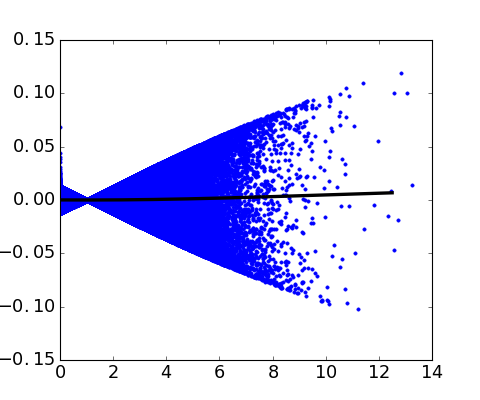

<IPython.core.display.Javascript object>


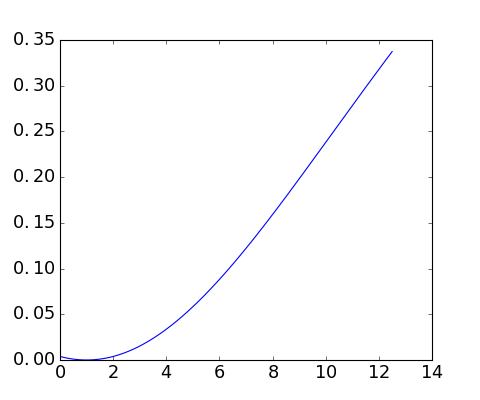

In [24]:
a = 1e-4 *1
g = 2e-2 *1
g2=g/2
maxX = 5
noise = 1e-3
nturns = 1e5
dp = noise**2*nturns
dp = 0.2
N=41
nbin=300
Q0 = 0.31
avgJ = 1

x= np.linspace(-1,1,N)*maxX
Xe,Pe = np.meshgrid(x,x)
X,P = np.meshgrid(center_edges(x),center_edges(x))


J0 = 0.5*(X**2+P**2) 
J0K= 0.5*(X**2+(P+dp)**2) 
dmu = pi2*a*(J0-avgJ)
sindmu = np.sin(dmu)  ;  sindmu2= np.sin(dmu/2)
JN = J0 + 0.5*(dp**2*((1-g2)**2*4*sindmu2**2)/(g2**2+4*(1-g2)*sindmu2**2))
JN += dp*(1-g2)*(X*g2*sindmu+P*(4-g)*sindmu2**2)/(g2**2+4*(1-g2)*sindmu2**2)

# sindmu = np.sin(dmu+pi2*a) ;  sindmu2= np.sin(dmu/2+pi2*a/2)
# JN += .5*dp*(1-g2)*(X*g2*sindmu+P*(4-g)*sindmu2**2)/(g2**2+4*(1-g2)*sindmu2**2)

# JN += np.real((X-1j*P)*1j*dp*((1-g2)*(1-np.exp(1j*dmu)))/(1-(1-g2)*np.exp(1j*dmu)))
# T=1-g2
# JN += np.real((X-1j*P)*1j*dp*(T*(1-np.exp(1j*dmu))*(1-T*np.exp(-1j*dmu)))/((1-(1-g2)*np.exp(1j*dmu))*(1-T*np.exp(-1j*dmu))))
# JN += np.real((X-1j*P)*1j*dp*T*(1+T-2*np.cos(dmu) + g2*np.exp(-1j*dmu))/(1+T**2-2*T*np.cos(dmu)))
# JN += np.real((X-1j*P)*1j*dp*T*(4*sindmu2**2+g2*(-1+np.exp(-1j*dmu)))/(1+T**2-2*T*np.cos(dmu)))
    

J0l = np.linspace(0,0.5*maxX**2,N*10)
dmul = pi2*a*(J0l-avgJ)
sindmul = np.sin(dmul)  ;  sindmul2= np.sin(dmul/2)
leb1 = (((1-g2)**2*4*sindmul2**2)/(g2**2+4*(1-g2)*sindmul2**2))
leb2 = (1-g2)*(g2*sindmul       )/(g2**2+4*(1-g2)*sindmul2**2)
leb3 = (1-g2)*((4-g)*sindmul2**2)/(g2**2+4*(1-g2)*sindmul2**2)
dJl = 0.5*dp**2*leb1
JNavg=J0l + dJl

# plt.figure()
# plt.pcolor(Xe,Pe,J0)
# plt.colorbar()

# plt.figure()
# plt.pcolor(Xe,Pe,JN)
# plt.colorbar()


# Figure 1
plt.figure()
vmax= dp/10
plt.pcolor(Xe,Pe,(JN-J0)/np.sqrt(2*J0),vmin=-vmax,vmax=vmax)
# plt.pcolor(Xe,Pe,J0K-J0)
plt.colorbar()
plt.title('Prediction')

NP = int(1e6)
X=np.random.normal(0,1,NP)
P=np.random.normal(0,1,NP)
phi0 = np.arctan2(P,X)
theta = phi0
J0 = 0.5*(X**2+P**2) 
# X==np.sqrt(2*J0)*np.cos(phi0)
J0K= 0.5*(X**2+(P+dp)**2)
dmu = pi2*a*(J0-avgJ)
sindmu = np.sin(dmu)  ;  sindmu2= np.sin(dmu/2)
JN = J0 + 0.5*(dp**2*((1-g2)**2*4*sindmu2**2)/(g2**2+4*(1-g2)*sindmu2**2)) 
JN += dp*(1-g2)*(X*g2*sindmu+P*(4-g)*sindmu2**2)/(g2**2+4*(1-g2)*sindmu2**2)

if 0:
    nsteps = 10
    for i in range(nsteps):
#         theta = np.random.uniform(0,2*np.pi,NP)
#         theta += 1000*(0+a*JN)
        theta += pi2/(nsteps+1)
        print(theta)
        
        
#         Jx = JN ;  meanJ = np.mean(JN)
        Jx = J0 ;  meanJ = np.mean(J0)
        
        
        dmu=pi2*a*(Jx-meanJ)
        sindmu = np.sin(dmu)  ;  sindmu2= np.sin(dmu/2)
        
        JN += dp*(1-g2)*(np.sqrt(2*Jx)*np.cos(theta)*g2*sindmu+np.sqrt(2*Jx)*np.sin(theta)*(4-g)*sindmu2**2)/(g2**2+4*(1-g2)*sindmu2**2)
        JN += 0.5*(dp**2*((1-g2)**2*4*sindmu2**2)/(g2**2+4*(1-g2)*sindmu2**2)) 
        
        JNavg += 0.5*(dp**2*((1-g2)**2*4*sindmul2**2)/(g2**2+4*(1-g2)*sindmul2**2))

#x px histogram
plt.figure()
W,xedges,yedges = np.histogram2d(X,P,N,range=[[-maxX,maxX],[-maxX,maxX]]); #weights=1
H3,xedges,yedges = np.histogram2d(X,P,N,range=[[-maxX,maxX],[-maxX,maxX]],weights=(JN-J0)/np.sqrt(2*J0));
H3=(H3/W).transpose()
X,Y = np.meshgrid(xedges,yedges)
F=H3
F = np.ma.masked_where(np.isnan(F), F)
vmax =np.nanmax(np.abs(F))
vmin=np.nanmin(F)
vmax = dp
vmin = -vmax
plt.pcolor(X,Y,F,vmin=vmin,vmax=vmax)
plt.colorbar()
plt.title(r'Prediction, $\Delta$J')
plt.xlabel(r'$x_0$') ; plt.ylabel(r'$p_{0}$')

###############################################
############ djx,jx histogram #################
plt.figure(figsize=(5,5))
# W,xedges,yedges = np.histogram2d(J0,JN-J0,N,range=[[0,6],[-dp**2*0.5,dp**2*0.5]]); #weights=1
vmax = np.min(np.max(JN-J0))
H,xedges,yedges = np.histogram2d(J0,JN-J0,[nbin,nbin*2],range=[[0,10],[-vmax,vmax]],normed=True) 
H = H.transpose()

vmax = H.max()
vmin = np.min(H[H>0])
plt.axis([0,6,-.22,.22])
print(vmin,vmax)
vmin= 3e-2 ; vmax=5e2
# vmax= 2e4
X,Y = np.meshgrid(xedges, yedges);
pcm=plt.pcolor(X,Y,H,norm =LogNorm(vmin=vmin,vmax=vmax),cmap='rainbow');
#X2,Y2 = np.meshgrid(edges_to_center(xedges), edges_to_center(yedges));
#pcm=plt.contourf(X2,Y2,H,levels=np.logspace(np.log10(vmin),np.log10(vmax),100),norm =LogNorm(vmin=vmin,vmax=vmax),cmap='rainbow');

cb=plt.colorbar(pcm ,ticks=np.logspace(-4,4,9))#,  extend='max')

plt.xlabel(r'$J_{x,0}$')
plt.ylabel(r'$\Delta J_x$',labelpad=-10)
plt.grid(True)
# plt.plot(J0l,JNavg-J0l,'k',lw=3)
# plt.plot(J0l, 0 + 0.5*dp**2 *leb1 + dp*np.sqrt(2*J0l)*np.sqrt(leb1),'k--',lw=3)
# plt.plot(J0l, 0 + 0.5*dp**2 *leb1 + dp*np.sqrt(2*J0l)*np.sqrt(leb2**2+leb3**2),'k:',lw=3)
# plt.plot(J0l, 0 + 0.5*dp**2 *leb1 - dp*np.sqrt(2*J0l)*np.sqrt(leb1),'k--',lw=3)
plt.tight_layout()


    
    
###############################################
############ djx,jx scatter ###################
plt.figure()
plt.plot(J0,(JN-J0)/np.sqrt(2*J0),'.')
# plt.plot(J0,J0K-J0,'.')
plt.plot(J0l,JNavg-J0l,'k',lw=3)

###############################################
# Theoretical

plt.figure()
plt.plot(J0l,leb1)


<IPython.core.display.Javascript object>


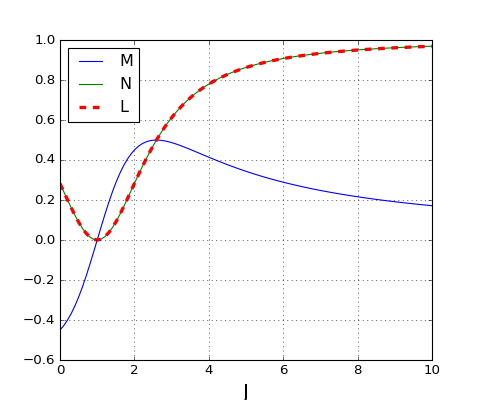

<IPython.core.display.Javascript object>


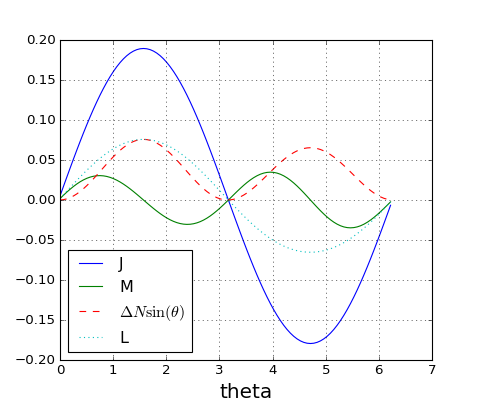

<IPython.core.display.Javascript object>


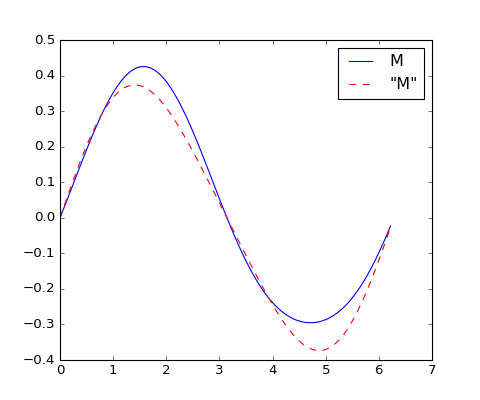

<IPython.core.display.Javascript object>


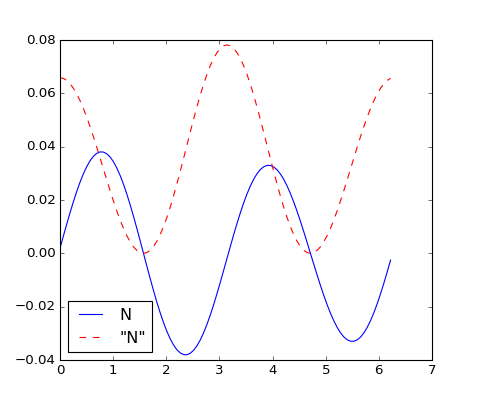

In [13]:
def JJ(J0,k,theta):
    return J0 + k**2/2 + np.sqrt(2*J0)*k*np.sin(theta)

def  MM(J,g,a):
    dmu = pi2*a*(J-1)
    g2 = func_g2(g)
    return (1-g2)*(g2)*np.sin(dmu) / (g2**2 + 4*(1-g2)*np.sin(dmu/2)**2)

def MM2(J0,k,theta,g,a):
    dmu0 = pi2*a*(J0-1)
    ddmu0= pi2*a
    dmu1 = (k*np.sqrt(2*J0)*np.cos(theta) +k**2/2)*ddmu0
    dmu1 = (k*np.sqrt(2*J0)*np.cos(theta)        )*ddmu0
    g2 = func_g2(g)
#    return (1-g2)*(g2)*(dmu0+dmu1)           / (g2**2 + (1-g2)*(dmu0+dmu1)**2)
    return (1-g2)*(g2)*(dmu0+dmu1) / (g2**2 + (1-g2)*(dmu0**2+2*dmu0*dmu1))


def NN(J,g,a):
    dmu = pi2*a*(J-1)
    g2 = func_g2(g)
    return (1-g2)*(4-g)*np.sin(dmu/2)**2 / (g2**2 + 4*(1-g2)*np.sin(dmu/2)**2)
    
    
def NN2(J0,k,theta,g,a):
    dmu0 = pi2*a*(J0-1)
    ddmu0= pi2*a
    dmu1 = (k*np.sqrt(2*J0)*np.cos(theta) +k**2/2)*ddmu0
    dmu1 = (k*np.sqrt(2*J0)*np.cos(theta)        )*ddmu0
    g2 = func_g2(g)
#    return (1-g2)*(1-g/4)*(dmu0+dmu1)**2        / (g2**2 + (1-g2)*(dmu0+dmu1)**2)
    return (1-g2)*(1-g/4)*(dmu0**2+2*dmu0*dmu1) / (g2**2 + (1-g2)*(dmu0**2+2*dmu0*dmu1))

    
def LL(J,g,a):
    dmu = pi2*a*(J-1)
    g2 = func_g2(g)
    return (1-g2)**2*4*np.sin(dmu/2)**2 / (g2**2 + 4*(1-g2)*np.sin(dmu/2)**2)

def LLfromNN(J0,g,a):
    dmu0 = pi2*a*(J0-1)
    ddmu0= pi2*a
    g2 = func_g2(g)
    return 2*J0*(1-g2)*(1-g/4)*g2**2*2*dmu0*ddmu0 / (g2**2 + (1-g2)*(dmu0)**2)**2
            

g=0.002
a=1e-4
k = dp

# Standard plot
J0 = np.linspace(0,10,100)
plt.figure()
plt.plot(J0,MM(J0,g,a),label='M')
plt.plot(J0,NN(J0,g,a),label='N')
plt.plot(J0,LL(J0,g,a),'--',lw=3,label='L')
# plt.plot(J0,LLfromNN(J0,g,a),label='L')
# plt.plot(J0,MM(J0,g,a)**2+NN(J0,g,a)**2,':',lw=3,label=r'M$^2$+N$^2$')
plt.legend(loc=0)
plt.grid(True)
plt.xlabel('J')

# variation due to theta
J0 = 1.7
theta = np.linspace(0,pi2,100,endpoint=False)
stheta= np.sin(theta)
ctheta= np.cos(theta)
J = JJ(J0,k,theta)
plt.figure()
plt.plot(theta,J-J0,label='J')
plt.plot(theta,(MM(J,g,a)-MM(J0,g,a))*ctheta,label='M')
plt.plot(theta,(NN(J,g,a)-NN(J0,g,a))*stheta,'--',label=r'$\Delta N \sin ( \theta )$')
plt.plot(theta,(LL(J,g,a)-LL(J0,g,a)),':',label='L')
plt.legend(loc=0)
plt.grid(True)
plt.xlabel('theta')

# Attempt at simpler expression
plt.figure()
plt.plot(theta,stheta*(MM(J,g,a)-          0*MM(J0,g,a)),label='M')
plt.plot(theta,stheta*(MM2(J0,k,theta,g,a)-0*MM2(J0,k,pi2/4,g,a)),'--r',label='\"M\"')
plt.legend(loc=0)

plt.figure()
plt.plot(theta,ctheta*(NN(J,g,a)-          1*NN(J0,g,a)),label='N')
plt.plot(theta,ctheta*(NN2(J0,k,theta,g,a)-1*NN2(J0,0,pi2/4,g,a)),'--r',label='\"N\"')
plt.legend(loc=0)


<IPython.core.display.Javascript object>


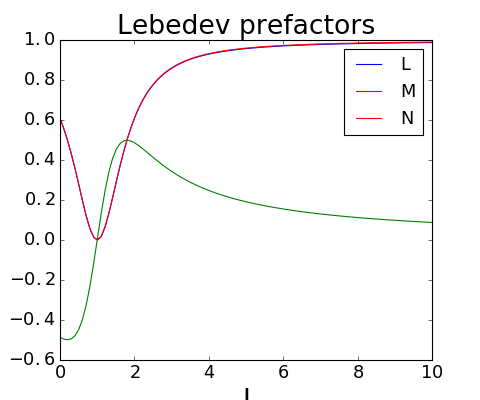

<IPython.core.display.Javascript object>


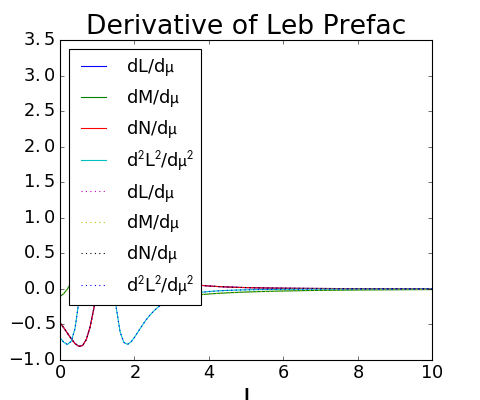

<IPython.core.display.Javascript object>


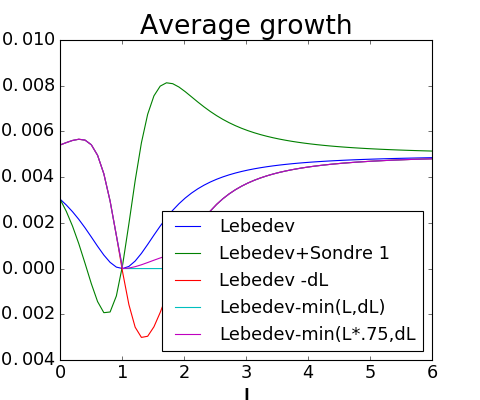

0 0.0019605601076614163 [ 0.01592445 -0.00947359 -0.12054419  0.00329175 -0.01334371  0.04404539
  0.00667555  0.00958782 -0.00034243 -0.01511279]


<IPython.core.display.Javascript object>


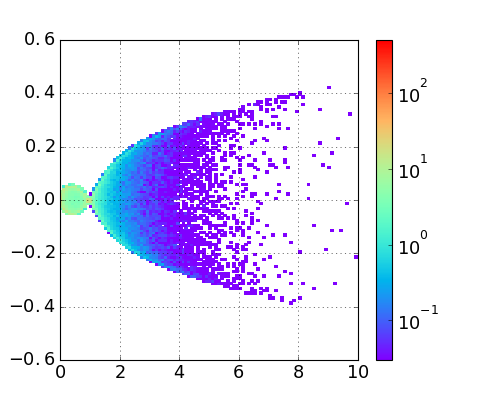

1 0.0024890769499363104 [ 0.01520909 -0.01132273 -0.11261264 -0.00171144 -0.01737747  0.04225007
  0.00657521  0.00950797 -0.00249627 -0.01526568]


<IPython.core.display.Javascript object>


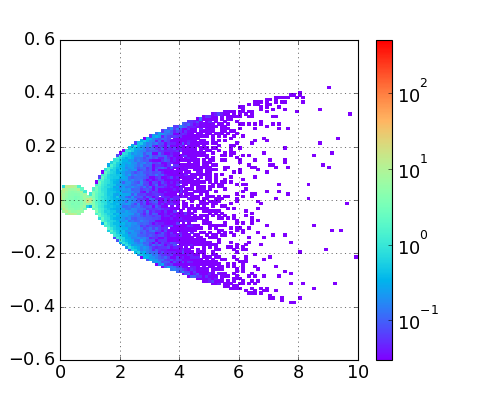

2 0.0005285168422748948 [-7.15363122e-04 -1.84913627e-03  7.93154652e-03 -5.00318583e-03
 -4.03375492e-03 -1.79531366e-03 -1.00339696e-04 -7.98407803e-05
 -2.15384549e-03 -1.52890462e-04]


<IPython.core.display.Javascript object>


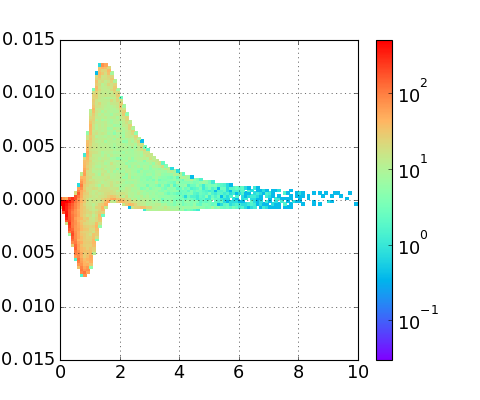

dydx 0.2680295267470996


/home/sfuruset/miniconda3/lib/python3.5/site-packages/ipykernel/__main__.py:169: RuntimeWarning: divide by zero encountered in true_divide
/home/sfuruset/miniconda3/lib/python3.5/site-packages/ipykernel/__main__.py:170: RuntimeWarning: divide by zero encountered in true_divide
/home/sfuruset/miniconda3/lib/python3.5/site-packages/ipykernel/__main__.py:171: RuntimeWarning: divide by zero encountered in true_divide
/home/sfuruset/miniconda3/lib/python3.5/site-packages/ipykernel/__main__.py:172: RuntimeWarning: divide by zero encountered in true_divide


<IPython.core.display.Javascript object>


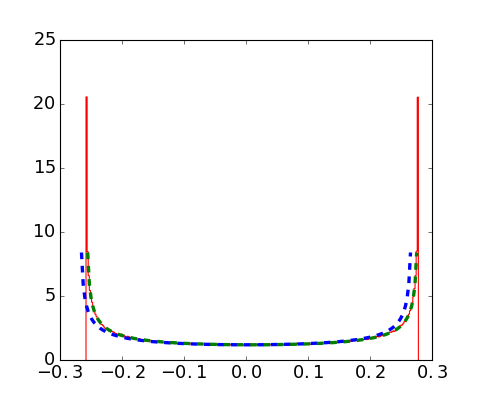

<IPython.core.display.Javascript object>


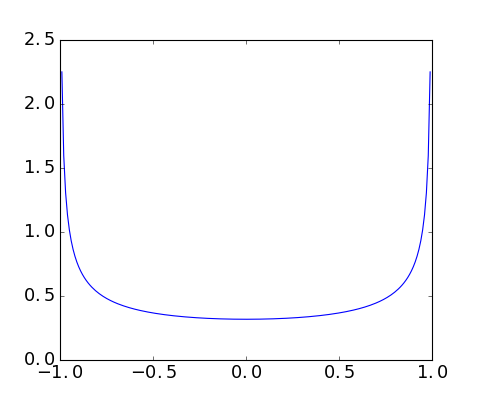

In [28]:
# Rewrite the above on 2019-01-30
pi2 = np.pi*2

def func_dmu(a,J):
    return pi2 * a * (J-1)
def dDmudJ(J):
    return pi2 * a

def JK(J0,k,theta):
    return J0 + k**2/2 + np.sqrt(2*J0)*k*np.sin(theta) #p \propto sin(phi)

def LL(g2,dmu):
    return (1-g2)**2*(dmu)**2       / (g2**2 + (1-g2)*(dmu)**2)

def MM(g2,dmu):
    return (1-g2)*(g2)*(dmu)        / (g2**2 + (1-g2)*(dmu)**2)

def NN(g2,dmu):
    return (1-g2)*(1-g2/2)*(dmu)**2 / (g2**2 + (1-g2)*(dmu)**2)

def dLLdm(g2,dmu):
    return (1-g2)**2*g2**2*2*(dmu)            / (g2**2 + (1-g2)*(dmu)**2)**2

def dMMdm(g2,dmu):
    return (1-g2)*(g2)*(g2**2-(1-g2)*(dmu)**2)/ (g2**2 + (1-g2)*(dmu)**2)**2

def dNNdm(g2,dmu):
    return (1-g2)*(1-g2/2)*g2**2*2*(dmu)      / (g2**2 + (1-g2)*(dmu)**2)**2

def deltaJ(J0,phi0,k,g2,dmu):
    A = np.sqrt(2*J0)
    cphi = np.cos(phi0)
    sphi = np.sin(phi0)
    L = LL(g2,dmu) ; M = MM(g2,dmu) ; N = NN(g2,dmu)
    dL = dLLdm(g2,dmu)*dDmudJ(J0)
    dM = dMMdm(g2,dmu)*dDmudJ(J0)
    dN = dNNdm(g2,dmu)*dDmudJ(J0)
    return  k*A*(M*cphi + N*sphi) +\
            k**2*(L/2 + J0*sphi * (dM *cphi +dN*sphi)) +\
            k**3*A/4*(dL*sphi + dM *cphi +dN*sphi) +\
            k**4/8*dL

def d2LLdmu2(g2,dmu):
    return       2*(1-g2)**2*g2**2* (g2**2 -3*(1-g2)*dmu**2 ) / (g2**2 + (1-g2)*(dmu)**2)**3
            
phi0 =0

k = .1
a = 1e-3
g= 0.01
g2 = func_g2(g)
J0 = np.linspace(0,10,100)
dmu = func_dmu(a,J0)

mus = '$\mathrm{μ}$'

L = LL(g2,dmu)
M = MM(g2,dmu)
N = NN(g2,dmu)
dL = dLLdm(g2,dmu)*a*pi2
dM = dMMdm(g2,dmu)*a*pi2
dN = dNNdm(g2,dmu)*a*pi2
d2L= d2LLdmu2(g2,dmu)*dDmudJ(J0)**2
preW = d2L +2*dL
# Lebedev prefactors
plt.figure()
plt.plot(J0,L,label='L')
plt.plot(J0,M,label='M')
plt.plot(J0,N,label='N')
plt.legend(loc=0)
plt.xlabel('J')
plt.title('Lebedev prefactors')

# Derivatives of lebedev prefactors
plt.figure()
plt.plot(J0,dL,label=r'dL/d%s'%mus)
plt.plot(J0,dM,label=r'dM/d%s'%mus)
plt.plot(J0,dN,label=r'dN/d%s'%mus)
plt.plot(J0,d2L,label=r'd$^2$L$^2$/d%s$^2$'%mus)
dJ=1e-4
plt.plot(J0,(LL(g2,dmu+dJ)-LL(g2,dmu-dJ))/(2*dJ)*a*pi2,':',label=r'dL/d%s'%mus)
plt.plot(J0,(MM(g2,dmu+dJ)-MM(g2,dmu-dJ))/(2*dJ)*a*pi2,':',label=r'dM/d%s'%mus)
plt.plot(J0,(NN(g2,dmu+dJ)-NN(g2,dmu-dJ))/(2*dJ)*a*pi2,':',label=r'dN/d%s'%mus)
plt.plot(J0,(LL(g2,dmu+dJ)-2*LL(g2,dmu)+LL(g2,dmu-dJ))/(dJ**2)*(a*pi2)**2,':',label=r'd$^2$L$^2$/d%s$^2$'%mus)

plt.legend(loc=0)
plt.xlabel('J')
plt.title('Derivative of Leb Prefac')
    
# Effect of average growth
plt.figure()
plt.plot(J0, k**2/2*L,label='Lebedev')
plt.plot(J0, k**2/2*(L + J0*dN),label='Lebedev+Sondre 1')
plt.plot(J0, k**2/2*(L - 1*dL),label='Lebedev -dL')
plt.plot(J0, k**2/2*(L - np.min([L,dL],axis=0)),label='Lebedev-min(L,dL)')
plt.plot(J0, k**2/2*(L - np.min([.75*L,dL],axis=0)),label='Lebedev-min(L*.75,dL')
# plt.plot(J0,preW,label='Transfer')
plt.xlabel('J')
plt.xlim(0,6)
plt.title('Average growth')
plt.legend(loc=0)

# Actual spread
# phi0 = np.linspace(0,pi2,10,endpoint=False)
# phi02D,J02D = np.meshgrid(phi0,J0)
# dmu2D = func_dmu(a,J02D)
# L = LL(g2,dmu2D)
# M = MM(g2,dmu2D)
# N = NN(g2,dmu2D)
# cphi0 = np.cos(phi02D)
# sphi0 = np.sin(phi02D)
# DJ = k**2/2*L + k*np.sqrt(2*J02D)*(M*cphi0 + N*sphi0)

# plt.figure()
# plt.scatter(J02D,DJ,marker=',')

# Stochastic
N = int(1e5)
maxx = 6
x = np.random.normal(0,1,N)
p = np.random.normal(0,1,N)
Js = 0.5*(x**2+p**2)
phis = np.arctan2(p,x)
dmu = func_dmu(a,Js)
cphis= np.cos(phis) ; sphis = np.sin(phis)
L = LL(g2,dmu)
M = MM(g2,dmu)
N = NN(g2,dmu)
dL = dLLdm(g2,dmu)*a*pi2
dM = dMMdm(g2,dmu)*a*pi2
dN = dNNdm(g2,dmu)*a*pi2
DJ1= k*np.sqrt(2*Js)*(M*cphis + N*sphis) + k**2/2*L
DJ2= k*np.sqrt(2*Js)*(M*cphis + N*sphis) +\
    k**2*(L/2 + Js*sphis * (dM *cphis +dN*sphis)) +\
    0*k**3*np.sqrt(2*Js)/4*(dL*sphis + dM *cphis +dN*sphis) +\
    0*k**4/8*dL

for i in range(3):
    DJ = [DJ1,DJ2,DJ2-DJ1][i]
    print(i,np.mean(DJ),DJ[:10])
    vmax = np.max(np.abs(DJ))
    H,xedges,yedges = np.histogram2d(Js,DJ,[100,100],range=[[0,10],[-vmax,vmax]],normed=True) 
    H = H.transpose()
    vmin= 3e-2 ; vmax=5e2
    # vmax= 
    # vmin = -vmax
    X,Y = np.meshgrid(xedges, yedges);
    plt.figure()
    # plt.plot(Js,DJ,'.')
    pcm=plt.pcolor(X,Y,H,norm =LogNorm(vmin=vmin,vmax=vmax),cmap='rainbow');
    # plt.xlim(0,6)
    cb=plt.colorbar(pcm ,ticks=np.logspace(-4,4,9))#,  extend='max')
    plt.grid(True)
    
    
# probability spread
Npart = 1e6
J0 = 1.8
k = 0.2
dmu = func_dmu(a,J0)
phis = np.random.uniform(0,pi2,int(Npart))
cphis = np.cos(phis)
sphis = np.sin(phis)
L = LL(g2,dmu)
M = MM(g2,dmu)
N = NN(g2,dmu)
DJ = k*np.sqrt(2*J0)*(M*cphis + N*sphis) + k**2/2*L
dydx = k*np.sqrt(2*J0*L)
mean = k**2/2*L
print('dydx',dydx)
x = np.linspace(-1,1,200) 
y = x * k*np.sqrt(2*J0)*L + k**2/2*L
y = x * dydx
z = y + mean
an = L*(k**2/2 + k*np.sqrt(2*J0)/np.sqrt(1-x**2))
an1 = 1/(np.pi*np.sqrt(1-x**2))
an2 = 1/(np.pi*np.sqrt(1-(y/dydx)**2)*dydx)
an3 = 1/(np.pi*np.sqrt(1-((z-mean)/dydx)**2)*dydx)
plt.figure()
plt.plot(y,an2,'--',lw=3)
plt.plot(z,an3,'--',lw=3)
plt.hist(DJ,bins=300,normed=True,histtype='step')
plt.figure()
plt.plot(x,an1)


In [157]:
np.arctan2(0,-1)
np.random.uniform(0,1,33)
print(0,pi2,N)
np.random.uniform(0,pi2,int(N))

0 6.283185307179586 [  1.37804677e-03   3.49041941e-03   5.65112880e-04 ...,   4.06162118e-02
   3.37442730e-07   1.60812326e-02]


TypeError: only length-1 arrays can be converted to Python scalars

<IPython.core.display.Javascript object>


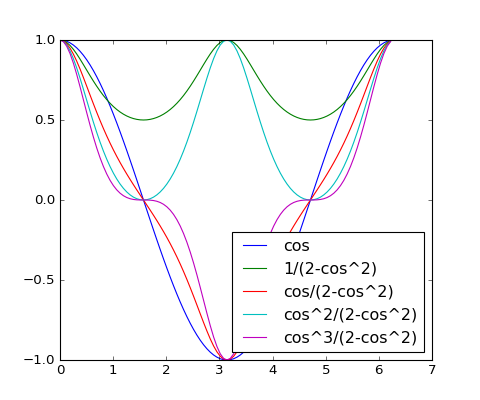

In [78]:
plt.figure()
plt.plot(theta,ctheta,label='cos')
plt.plot(theta,1/(2-ctheta**2),label='1/(2-cos^2)')
plt.plot(theta,ctheta/(2-ctheta**2),label='cos/(2-cos^2)')
plt.plot(theta,ctheta**2/(2-ctheta**2),label='cos^2/(2-cos^2)')
plt.plot(theta,ctheta**3/(2-ctheta**2),label='cos^3/(2-cos^2)')
plt.legend(loc=0)

<IPython.core.display.Javascript object>


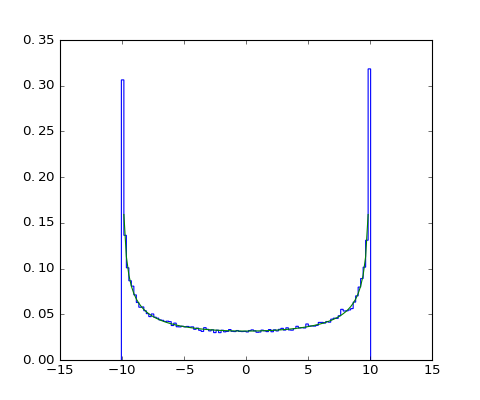

/home/sfuruset/miniconda3/lib/python3.5/site-packages/ipykernel/__main__.py:13: RuntimeWarning: divide by zero encountered in true_divide


<IPython.core.display.Javascript object>


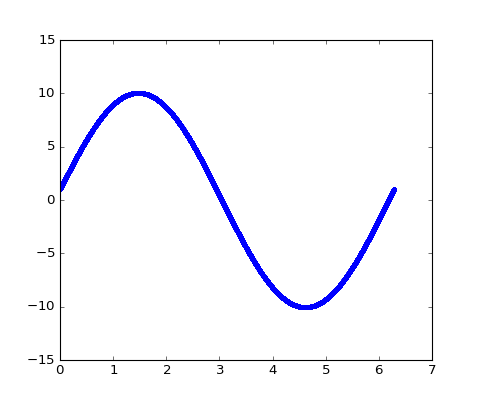

In [211]:
a=1
b=10
Np=int(1e5)
phis = np.random.uniform(0,pi2,Np)
cphis = np.cos(phis) ; sphis = np.sin(phis)

dx = a*cphis + b*sphis

plt.figure()
plt.hist(dx,bins=100,histtype='step',normed=True)
xm=np.sqrt(a**2+b**2)
x= np.linspace(-xm,xm,100,endpoint=False)
plt.plot(x,1/(np.pi*np.sqrt(xm**2-x**2)))

plt.figure()
plt.plot(phis,dx,'.')